<a href="https://colab.research.google.com/github/marnieboyer/DSND-blog/blob/master/airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install folium 

import pandas as pd
import numpy as np

import os
import folium

from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn import metrics
from sklearn.model_selection import cross_val_score, train_test_split
from folium.plugins import HeatMap

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
listings = pd.read_csv('drive/My Drive/listings.csv',dtype='str')
calendar =  pd.read_csv('drive/My Drive/calendar.csv',dtype='str')
reviews =  pd.read_csv('drive/My Drive/reviews.csv',dtype='str')


In [4]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [5]:
calendar.describe()

,listing_id,date,available,price
count,1308890,1308890,1308890,643037
unique,3585,365,2,1246
top,12898806,2017-04-22,f,$150.00
freq,730,3586,665853,20752


In [6]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10,f,NaN,NaN,f,moderate,f,f,1,1
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10,f,NaN,NaN,f,flexible,f,f,1,2.25


In [7]:
listings.describe()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
count,3585,3585,3585,3585,3585,3442,2528,3585,3585,2170,...,2764,3585,0.0,0.0,3585,3585,3585,3585,3585,2829
unique,3585,3585,1,1,3504,3113,2268,3423,1,1728,...,9,1,0.0,0.0,2,4,2,2,25,651
top,12409042,https://www.airbnb.com/rooms/13642655,20160906204935,2016-09-07,Lux 2BR by Fenway w/WiFi,"The unit is stylishly designed for comfort, va...",The studio's kitchenette comes equipped with a...,Private room in a HOSTEL exclusive for Airbnb ...,none,Conveniently bordering the neighborhoods of th...,...,10,f,NaN,NaN,f,strict,f,f,1,1
freq,1,1,3585,3585,8,21,17,7,3585,21,...,1177,3585,NaN,NaN,2991,1582,3518,3348,1768,111


In [8]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [9]:
calendar.columns

Index(['listing_id', 'date', 'available', 'price'], dtype='object')

In [10]:
calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [11]:
reviews.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [0]:
keep_columns = ['id', 'price',
       'neighbourhood_cleansed', 
       'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       # remove other prices which will naturally be correlated to price: 'weekly_price', 'monthly_price', 'security_deposit',
       'cleaning_fee', 'guests_included', 
       'number_of_reviews',
        'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'requires_license',
        'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count',
       'reviews_per_month']

In [0]:
train = listings[keep_columns]

In [14]:
train.head()

,id,price,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,$250.00,Roslindale,House,Entire home/apt,4,1.5,2,3,Real Bed,...,NaN,NaN,NaN,f,f,moderate,f,f,1,NaN
1,3075044,$65.00,Roslindale,Apartment,Private room,2,1.0,1,1,Real Bed,...,10,9,9,f,t,moderate,f,f,1,1.30
2,6976,$65.00,Roslindale,Apartment,Private room,2,1.0,1,1,Real Bed,...,10,9,10,f,f,moderate,t,f,1,0.47
3,1436513,$75.00,Roslindale,House,Private room,4,1.0,1,2,Real Bed,...,10,10,10,f,f,moderate,f,f,1,1
4,7651065,$79.00,Roslindale,House,Private room,2,1.5,1,2,Real Bed,...,10,9,10,f,f,flexible,f,f,1,2.25


In [15]:
# Check the data types in the calendar table
train.dtypes

id                                  object
price                               object
neighbourhood_cleansed              object
property_type                       object
room_type                           object
accommodates                        object
bathrooms                           object
bedrooms                            object
beds                                object
bed_type                            object
amenities                           object
square_feet                         object
cleaning_fee                        object
guests_included                     object
number_of_reviews                   object
review_scores_rating                object
review_scores_accuracy              object
review_scores_cleanliness           object
review_scores_checkin               object
review_scores_communication         object
review_scores_location              object
review_scores_value                 object
requires_license                    object
instant_boo

### Need to turn some columns into a number so I can perform calculations with it. For price, you can see that the format includes a dollar sign, so need to remove that first.

In [0]:
train = listings[keep_columns]

In [17]:
train['price'] = train.price.str.replace(',','')
train['price'] = train.price.str.replace('$','')
train[['price']] = train[['price']].astype(float)

train[['bedrooms']] = train[['bedrooms']].astype(float)
train[['bathrooms']] = train[['bathrooms']].astype(float)
train[['beds']] = train[['beds']].astype(float)
train[['accommodates']] = train[['accommodates']].astype(float)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org

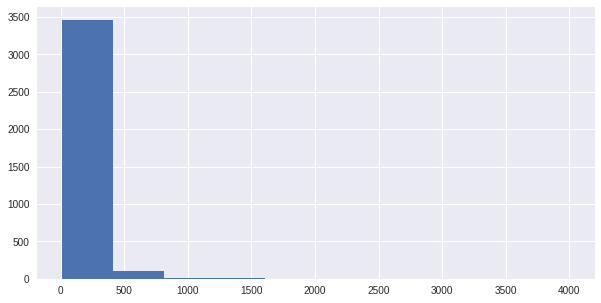

In [18]:
train["price"].hist(bins = 10,figsize = (10,5))


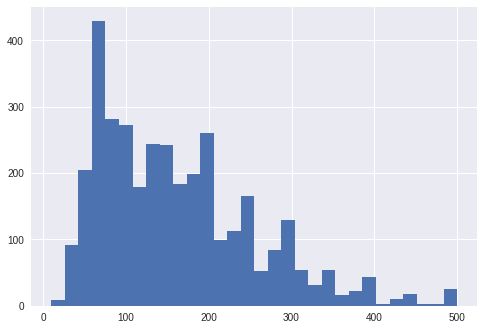

In [19]:
# You can see that there are some crazy outliers, remove them

train = train.loc[train['price'] <= 500]
train["price"].hist(bins = 30)

### What are the most expensive neighborhoods to rent in Boston?

In [0]:
neighborhood = train.groupby(['neighbourhood_cleansed'])['price'].mean()
neighborhood = neighborhood.to_frame().reset_index()
neighborhood = neighborhood.sort_values(by='price',ascending=False)

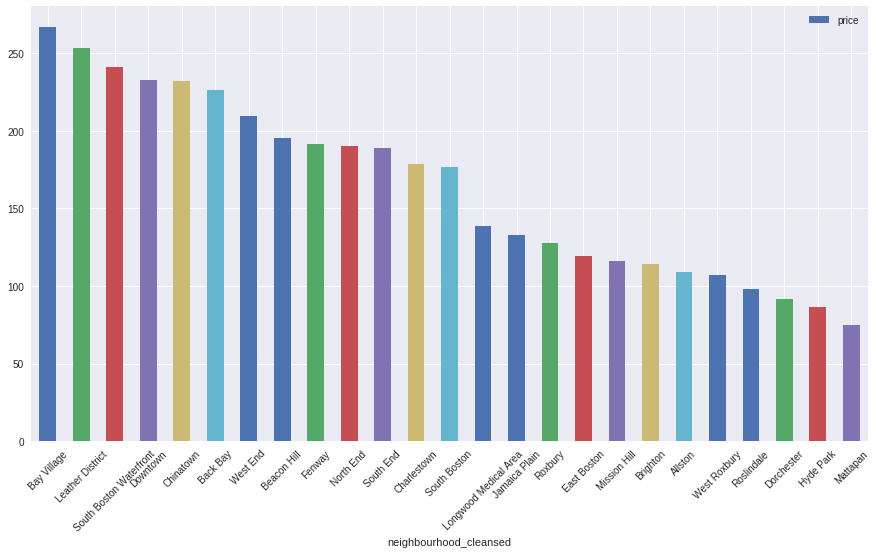

In [21]:
ax = neighborhood.plot.bar(x='neighbourhood_cleansed', y='price', rot=45, figsize = (15,8))


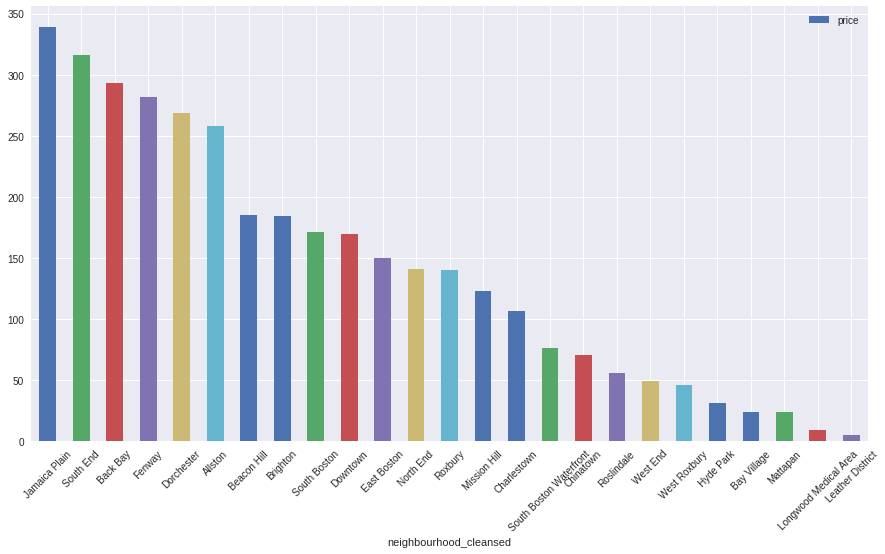

In [22]:
neighborhoodct = train.groupby(['neighbourhood_cleansed'])['price'].count()
neighborhoodct = neighborhoodct.to_frame().reset_index()
neighborhoodct = neighborhoodct.sort_values(by='price',ascending=False)
ax2 = neighborhoodct.plot.bar(x='neighbourhood_cleansed', y='price', rot=45, figsize = (15,8))

In [0]:
#Property Type
prop = train.groupby(['property_type'])['price'].mean()
prop = prop.to_frame().reset_index()
prop = prop.sort_values(by='price',ascending=False)

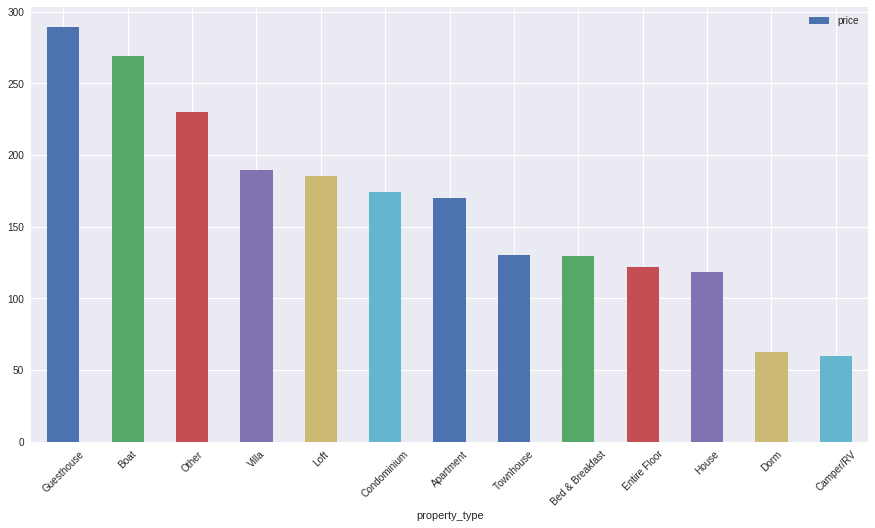

In [24]:
ax2 = prop.plot.bar(x='property_type', y='price', rot=45, figsize = (15,8))

In [25]:
locs = listings[['latitude', 'longitude','price']]

locs['price'] = locs.price.str.replace(',','')
locs['price'] = locs.price.str.replace('$','')
locs[['latitude','longitude','price']] = locs[['latitude','longitude','price']].astype(float)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [0]:
just_locs = locs.drop(['price'],axis = 1)
price = locs[['price']]

In [73]:
data1 =  just_locs.values.tolist()
data2 =  locs.values.tolist()

m = folium.Map(location=[42.3198, -71.0589],  width=1150, height=800, zoom_start = 12)

#'stamentoner'

HeatMap(data1,radius = 10).add_to(m)

m

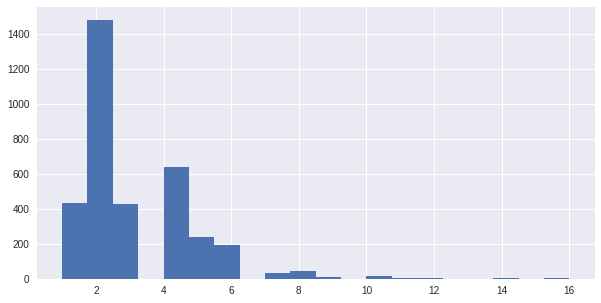

In [28]:
train["accommodates"].hist(bins = 20,figsize = (10,5))


### Most rentals accomodate 5 or fewer people.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


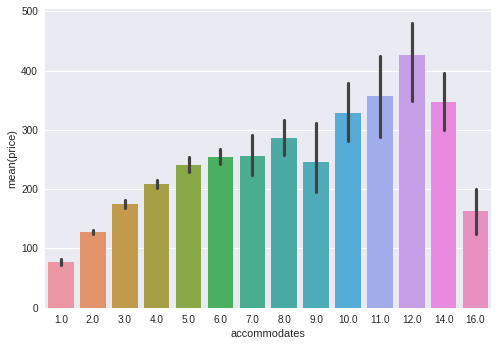

In [29]:
import seaborn as sns
sns.barplot(x = "accommodates", y = "price", data = train)

## Prepare data for modeling

#### Need to encode the categoricals

In [0]:
cat_columns = [
       'neighbourhood_cleansed', 
       'property_type', 'room_type', 
        'bed_type', 
       'cancellation_policy']

In [0]:
train_model = pd.get_dummies(train[cat_columns])

In [32]:
train_model.head()

,neighbourhood_cleansed_Allston,neighbourhood_cleansed_Back Bay,neighbourhood_cleansed_Bay Village,neighbourhood_cleansed_Beacon Hill,neighbourhood_cleansed_Brighton,neighbourhood_cleansed_Charlestown,neighbourhood_cleansed_Chinatown,neighbourhood_cleansed_Dorchester,neighbourhood_cleansed_Downtown,neighbourhood_cleansed_East Boston,...,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


#### Next look at the text columns

In [0]:
train.amenities = train.amenities.str.replace("[{}]", "")

In [0]:
amenities = train.amenities.str.get_dummies(sep = ",")

In [35]:
amenities.head()

,"""24-Hour Check-in""","""Air Conditioning""","""Buzzer/Wireless Intercom""","""Cable TV""","""Carbon Monoxide Detector""","""Elevator in Building""","""Family/Kid Friendly""","""Fire Extinguisher""","""First Aid Kit""","""Free Parking on Premises""",...,Gym,Hangers,Heating,Internet,Iron,Kitchen,Pool,Shampoo,TV,Washer
0,0,0,0,0,0,0,1,1,0,1,...,0,0,1,0,0,1,0,1,1,1
1,0,1,0,0,1,0,1,1,0,0,...,0,1,1,1,1,1,0,1,1,1
2,0,1,0,1,1,0,0,0,1,1,...,0,0,1,0,0,1,0,1,1,1
3,0,1,0,0,1,0,0,1,1,1,...,1,1,1,1,1,1,0,1,1,1
4,0,1,0,0,1,0,0,0,1,0,...,0,1,1,1,1,1,0,1,0,0


In [0]:
num_columns = ['id', 'price', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'square_feet',
        'guests_included',   
        'number_of_reviews',
        'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'calculated_host_listings_count',
       'reviews_per_month']

#### Merge them back together

In [0]:
train_num = train[num_columns]

In [0]:
 train_db = pd.concat([train_num, train_model, amenities], axis=1, join='inner')

#### Handle missing data

In [39]:
train_db.shape

(3519, 113)

In [40]:
train_db.dtypes

id                                               object
price                                           float64
accommodates                                    float64
bathrooms                                       float64
bedrooms                                        float64
beds                                            float64
square_feet                                      object
guests_included                                  object
number_of_reviews                                object
review_scores_rating                             object
review_scores_accuracy                           object
review_scores_cleanliness                        object
review_scores_checkin                            object
review_scores_communication                      object
review_scores_location                           object
review_scores_value                              object
calculated_host_listings_count                   object
reviews_per_month                               

In [41]:
# remove NAs, or handle differently

nulls=train_db.isna().sum()
nulls = nulls.to_frame().reset_index()
nulls = nulls.sort_values(by=0,ascending=False)
nulls.head(15)

,index,0
6,square_feet,3465
10,review_scores_accuracy,798
14,review_scores_location,797
15,review_scores_value,796
12,review_scores_checkin,795
13,review_scores_communication,793
11,review_scores_cleanliness,793
9,review_scores_rating,788
17,reviews_per_month,733
3,bathrooms,14


In [0]:
# Based on the counts above, I need to remove the square foot colum because almost all of the data is missing. I also think I should remove the reviews columns because almost records are missing data..
# For bathrooms and bedrooms, I can use the average from that columns. It's only a handful of missing records.

In [0]:
train_db = train_db.drop(['square_feet','review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'reviews_per_month'],axis = 1)

In [0]:
train_db=train_db.fillna(train_db.mean())

In [45]:
train_db.head()

,id,price,accommodates,bathrooms,bedrooms,beds,guests_included,number_of_reviews,calculated_host_listings_count,neighbourhood_cleansed_Allston,...,Gym,Hangers,Heating,Internet,Iron,Kitchen,Pool,Shampoo,TV,Washer
0,12147973,250.0,4.0,1.5,2.0,3.0,1,0,1,0,...,0,0,1,0,0,1,0,1,1,1
1,3075044,65.0,2.0,1.0,1.0,1.0,0,36,1,0,...,0,1,1,1,1,1,0,1,1,1
2,6976,65.0,2.0,1.0,1.0,1.0,1,41,1,0,...,0,0,1,0,0,1,0,1,1,1
3,1436513,75.0,4.0,1.0,1.0,2.0,2,1,1,0,...,1,1,1,1,1,1,0,1,1,1
4,7651065,79.0,2.0,1.5,1.0,2.0,1,29,1,0,...,0,1,1,1,1,1,0,1,0,0


In [46]:
train_db.isna().sum()

id                                              0
price                                           0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
guests_included                                 0
number_of_reviews                               0
calculated_host_listings_count                  0
neighbourhood_cleansed_Allston                  0
neighbourhood_cleansed_Back Bay                 0
neighbourhood_cleansed_Bay Village              0
neighbourhood_cleansed_Beacon Hill              0
neighbourhood_cleansed_Brighton                 0
neighbourhood_cleansed_Charlestown              0
neighbourhood_cleansed_Chinatown                0
neighbourhood_cleansed_Dorchester               0
neighbourhood_cleansed_Downtown                 0
neighbourhood_cleansed_East Boston              0
neighbourhood_cleansed_Fenway                   0


In [0]:
y = train_db['price']
train_db = train_db.drop(['price','id'],axis = 1)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_db, y, test_size=0.2)

In [0]:
linear = LinearRegression(normalize=True)
lasso = Lasso(normalize=True)
ridge = Ridge(normalize=True)

In [0]:
def run_model(model, X, y, state = 25):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = state)
    predictions = model.fit(X_train, y_train).predict(X_test)
    score = model.score(X_test, y_test)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
    return score, rmse
 

In [0]:
models = [linear, lasso, ridge]

score = []
rmse = []

for model in models:
  model_score, model_rmse = run_model(model,train_db,y, state = 25)
  score.append(model_score)
  rmse.append(model_rmse)

In [95]:
score

[-1.3007560671045886e+25, 0.09522889254345357, 0.6225993785183993]

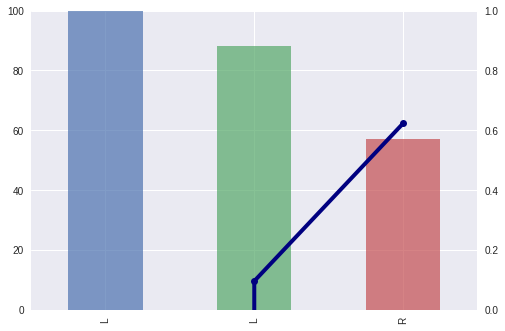

In [99]:
model_eval = pd.DataFrame({"range": list("LLR"),"score":score, "rmse":rmse})
fig = plt.figure()
ax = model_eval['rmse'].plot(kind="bar", alpha=0.7)

ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),model_eval['score'],marker='o', c='navy', linewidth=4)

ax.set_xticklabels(model_eval['range'])
ax.set_ylim(0,100)
ax2.set_ylim(0,1)
ax2.grid(False)
plt.show()

### The Ridge model is the best because of the lower error and higher score. Ridge regression handles sparse data well.
### Next step would be to understand which variables are most impacting the price.


In [52]:
ridge_coef = pd.DataFrame(list(zip(train_db.columns,ridge.coef_)), columns = ['feature','coefficient'])

ridge_coef.sort_values(by='coefficient', ascending=False)

,feature,coefficient
42,property_type_Other,51.616352
9,neighbourhood_cleansed_Bay Village,45.761702
56,cancellation_policy_super_strict_30,40.610672
34,property_type_Boat,32.293163
20,neighbourhood_cleansed_Leather District,28.242515
8,neighbourhood_cleansed_Back Bay,23.808107
45,room_type_Entire home/apt,19.955955
15,neighbourhood_cleansed_Downtown,18.885354
28,neighbourhood_cleansed_South Boston Waterfront,18.754360
10,neighbourhood_cleansed_Beacon Hill,17.107388


#### What you can see here is that there are several factors that are strongly positively correlated to price, such as the location, the type of property and the cancellation policy (note, I would infer that the strict policy is the result of the premium price, NOT the cause of it!)

The model confirms data we saw above where Bay Village, Leather District and the Back Bay neighborhoods are among the most expensive.  In addition, the property types of "Other", boat and entire home/apartment are also premium properties. 

On the other hand, there are several variables that are negatively correlated with the price. These variables include the property type of camper/RV, dorm, and private room. The lower priced neighborhoods include Hyde Park, Roslindale and Dorchester.  

The graphs above support these findings while the model's coefficients provide us a way to determine the impact of these variables on the prices.

#### Reviews analysis

In [53]:
train_db.head()

,accommodates,bathrooms,bedrooms,beds,guests_included,number_of_reviews,calculated_host_listings_count,neighbourhood_cleansed_Allston,neighbourhood_cleansed_Back Bay,neighbourhood_cleansed_Bay Village,...,Gym,Hangers,Heating,Internet,Iron,Kitchen,Pool,Shampoo,TV,Washer
0,4.0,1.5,2.0,3.0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,1,1,1
1,2.0,1.0,1.0,1.0,0,36,1,0,0,0,...,0,1,1,1,1,1,0,1,1,1
2,2.0,1.0,1.0,1.0,1,41,1,0,0,0,...,0,0,1,0,0,1,0,1,1,1
3,4.0,1.0,1.0,2.0,2,1,1,0,0,0,...,1,1,1,1,1,1,0,1,1,1
4,2.0,1.5,1.0,2.0,1,29,1,0,0,0,...,0,1,1,1,1,1,0,1,0,0


## Using the calendar data, we can determine how prices fluctuate throughout the year

In [54]:
# First, I need to determine if the data is the right type for analysis
calendar.dtypes

listing_id    object
date          object
available     object
price         object
dtype: object

In [0]:
#### The data is not in the right format, so I will make some translations here:

In [0]:
calendar['date'] = pd.to_datetime(calendar['date'] )
calendar['price'] = calendar.price.str.replace(',','')
calendar['price'] = calendar.price.str.replace('$','')
calendar[['price']] = calendar[['price']].astype(float)

In [57]:
# re-check
calendar.dtypes

listing_id            object
date          datetime64[ns]
available             object
price                float64
dtype: object

In [0]:
# looks good now.
# Now I will set up the table to use in a line chart:

In [0]:
timeline = calendar.groupby(['date'])['price'].mean()
timeline = timeline.to_frame().reset_index()
timeline = timeline.sort_values(by='date',ascending=True)

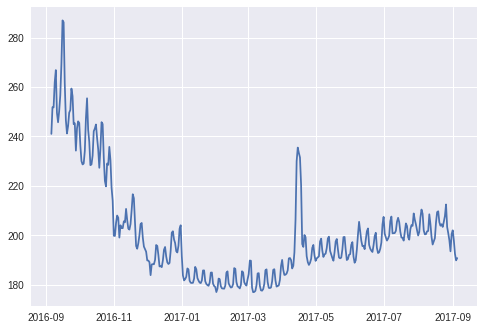

In [60]:
plt.plot(timeline['date'],timeline['price'])